## Task 4 - Satisfaction Analysis

#### Assuming that the satisfaction of a user is dependent on user engagement and experience, you’re expected in this section to analyze customer satisfaction in depth. The following tasks will guide you:


In [1]:

#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [2]:
pd.set_option('display.max_column', None)
user_eng_df = pd.read_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\User_Experience.csv")
user_eng_df.head()

,Unnamed: 0,Cluster,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,0,0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,2.080991e+07,759658.664811,23.0,44.0,47.000000,46.0,2.156957e+07
1,1,0,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,2.080991e+07,759658.664811,16.0,26.0,70.000000,32.0,2.156957e+07
2,2,2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07
3,3,2,3.375034e+10,undefined,109.795706,17.662883,2.080991e+07,759658.664811,44.0,44.0,127.458589,88.0,2.156957e+07
4,4,2,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,2.080991e+07,759658.664811,6.0,9.0,127.458589,12.0,2.156957e+07


In [7]:
import pickle
with open('D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\user_exp.pkl',"rb") as f:
    kmeans1 = pickle.load(f)

In [8]:
eng_df = user_eng_df.set_index('MSISDN/Number')[
    ['Total_Avg_RTT', 'Total_Avg_Bearer_TP']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(eng_df)
pd.DataFrame(scaled_array).head(5)

,0,1
0,-0.401384,-0.553863
1,-0.136348,-0.554155
2,0.525765,-0.554572
3,0.525765,-0.552987
4,0.525765,-0.554572


In [13]:
exper_centr = user_eng_df.iloc[:,10:]
exper_centr

,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,47.000000,46.000000,2.156957e+07
1,70.000000,32.000000,2.156957e+07
2,127.458589,12.000000,2.156957e+07
3,127.458589,88.000000,2.156957e+07
4,127.458589,12.000000,2.156957e+07
...,...,...,...
149996,32.000000,104.000000,2.156957e+07
149997,29.000000,46.000000,2.156957e+07
149998,49.000000,86.000000,2.156957e+07
149999,42.000000,68.000000,2.156957e+07


##### In this section, you’re expected to focus on network parameters like TCP retransmission, Round Trip Time (RTT), Throughput, and the customers’ device characteristics like the handset type to conduct a deep user experience analysis. The network parameters are all columns in the dataset

### Based on the engagement analysis + the experience analysis you conducted above ,
#### Write a python program to assign:
##### *Engagement score to each user
##### *Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this) (Euclidean Distance) experience score to each user.
##### *Consider the experience score as the Euclidean distance between the user data point & the worst experience’s cluster.

### Experience

In [15]:
exper_centr = pd.read_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\experience.csv")
exper_centr = exper_centr.iloc[:,1:]
exper_centr

,Average RTT,Average TCP,Average throughput
0,0.750116,-0.506050,-0.744422
1,-1.230701,0.827638,-0.152066
2,0.518475,-0.346097,1.408331


In [16]:
exper_metr = pd.read_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\st_experience.csv")
exper_metr.index = exper_metr['MSISDN/Number']
exper_metr = exper_metr.iloc[:106856,1:4]
exper_metr

,Average TCP,Average throughput,Average RTT
MSISDN/Number,,,
3.366117e+10,-1.357519,15.220434,0.510533
3.369817e+10,0.711986,11.928930,-0.596697
3.367251e+10,-1.480467,11.918292,-0.714487
3.365169e+10,-1.396600,10.960414,-0.855836
3.366856e+10,0.692157,10.681835,-0.596697
...,...,...,...
3.361648e+10,0.761222,-0.552987,-0.855836
3.362400e+10,0.761222,-0.552987,-1.303439
3.376193e+10,0.761222,-0.552987,-0.125535


### Engagement

In [18]:
# centroid file from previous outputs
enga_centr = pd.read_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\centero_engagment.csv")
enga_centr = enga_centr.iloc[:,1:]
enga_centr

,Total UL and DL,Dur. (ms),sessions frequency
0,-0.018266,5.431628,0.046955
1,-0.009948,1.332984,-0.210176
2,1.256253,-0.241265,-0.218358
3,-1.266658,-0.253828,-0.220158
4,0.010122,-0.050115,2.807734
5,-0.002853,-0.416422,-0.232556


In [19]:
# Import standardized engagement metric values 
enga_metr = pd.read_csv("D:\\Digicrome classes\\NextHIkes\\Project 5\\std_engagement.csv")
enga_metr.index = enga_metr['MSISDN/Number']
enga_metr = enga_metr.iloc[:,1:4]
enga_metr.head()

,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.158862,20.571127,-0.495197
3.360100e+10,0.921507,15.109232,-0.495197
3.360100e+10,-0.575403,15.069424,-0.495197
3.360101e+10,2.095055,14.589959,-0.495197
3.360101e+10,0.701781,11.820586,0.731244


In [21]:
from sklearn.metrics.pairwise import euclidean_distances

In [22]:
# calculating the distance between the metric values and the centroid of the the first k-means cluster
engagement_score = euclidean_distances(enga_metr.values.tolist(),[enga_centr.values.tolist()[0]])
engagement_score

array([[15.19208078],
       [ 9.73822996],
       [ 9.66909777],
       ...,
       [ 4.61464489],
       [ 4.66646744],
       [ 4.70325266]])

In [24]:
engagement_score = [val[0] for val in engagement_score.tolist()]
engagement_score[:2]

[15.192080784619563, 9.738229960336461]

### Consider the average of both engagement & experience scores as the satisfaction score & report the top 10 satisfied customer

In [25]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculating the distance between the metric values and the centroid of the the first k-means cluster
experience_score = euclidean_distances(exper_metr.values.tolist(),[exper_centr.values.tolist()[0]])
experience_score

array([[15.91663653],
       [12.43591568],
       [12.62302166],
       ...,
       [ 0.62076363],
       [ 0.32701291],
       [ 1.99664168]])

In [26]:
experience_score = [val[0] for val in experience_score.tolist()]
experience_score[:2]

[15.916636529999163, 12.4359156801666]

In [27]:
#creating a dataframe to contain both engagement and experience score with index being 'MSISDN/Number' to identify the user
df = pd.DataFrame()
df['engagement_score'] = engagement_score
df['experience_score'] = experience_score
df.index = enga_metr.index
#result
df.head()

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.192081,15.916637
3.360100e+10,9.738230,12.435916
3.360100e+10,9.669098,12.623022
3.360101e+10,9.414621,11.666216
3.360101e+10,6.465718,11.189011


In [28]:
# Creating a new column for the dataframe representing satisfaction calculated as an average of engagement and experience score
df['satisfaction_score'] = (df['engagement_score'] + df['experience_score'])/2
df.head()

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.192081,15.916637,15.554359
3.360100e+10,9.738230,12.435916,11.087073
3.360100e+10,9.669098,12.623022,11.146060
3.360101e+10,9.414621,11.666216,10.540418
3.360101e+10,6.465718,11.189011,8.827364


In [36]:
top10_satisfied_customers = df.sort_values(by='satisfaction_score', ascending=False).iloc[:10,:]
top10_satisfied_customers.to_csv('D:\\Digicrome classes\\NextHIkes\\Project 5\\top10_satisfied_customers.csv')
top10_satisfied_customersx

,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.192081,15.916637,15.554359
3.362632e+10,21.296090,4.031117,12.663603
3.361489e+10,20.047971,5.138084,12.593027
3.362578e+10,20.110156,3.021788,11.565972
3.360100e+10,9.669098,12.623022,11.146060
3.360100e+10,9.738230,12.435916,11.087073
3.360101e+10,9.414621,11.666216,10.540418
3.365973e+10,18.700767,0.817626,9.759196
3.360313e+10,14.092319,5.300125,9.696222


### Build a regression model of your choice to predict the satisfaction score of a customer.

In [31]:
# Form a new Model training Dataframe consisting all of the columns
train_df = enga_metr.copy(deep=True)
train_df['Average TCP'] = exper_metr['Average TCP'].to_list()
train_df['Average RTT'] = exper_metr['Average RTT'].to_list()
train_df['Average throughput'] = exper_metr['Average throughput'].to_list()
# Adding our average satisfaction score (this is going to be our predicted value)
train_df['satisfaction_score'] = df['satisfaction_score'].to_list()
train_df.head()

,Total UL and DL,Dur. (ms),sessions frequency,Average TCP,Average RTT,Average throughput,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,-1.158862,20.571127,-0.495197,-1.357519,0.510533,15.220434,15.554359
3.360100e+10,0.921507,15.109232,-0.495197,0.711986,-0.596697,11.928930,11.087073
3.360100e+10,-0.575403,15.069424,-0.495197,-1.480467,-0.714487,11.918292,11.146060
3.360101e+10,2.095055,14.589959,-0.495197,-1.396600,-0.855836,10.960414,10.540418
3.360101e+10,0.701781,11.820586,0.731244,0.692157,-0.596697,10.681835,8.827364


In [32]:
# Dividing the train data into actual train data (train + validation) and test data
train_data = train_df.iloc[:int(len(train_df) * 0.8),:]
test_data = train_df.iloc[int(len(train_df) * 0.8):,:]

In [33]:
train_x = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1:]
# 
test_x = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1:]

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(train_x,train_y,test_size=0.2,random_state=40)

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
alpha_val = 0.8
rr = Ridge(alpha=alpha_val)
rr.fit(xtrain, ytrain)
# Validation value of the model
validation_score = rr.score(xtest, ytest)
print("The model score is: {:.5f}".format(validation_score))

The model score is: 0.88214


In [37]:
from joblib import dump
# Saving the final Model using joblibs dump
dump(rr, 'D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\satisfaction_model.joblib')

['D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\satisfaction_model.joblib']

### Run a k-means (k=2) on the engagement & the experience score .

In [38]:
cluster_df = df.iloc[:,:2]
cluster_df.head()

,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.192081,15.916637
3.360100e+10,9.738230,12.435916
3.360100e+10,9.669098,12.623022
3.360101e+10,9.414621,11.666216
3.360101e+10,6.465718,11.189011


In [39]:
# Creating a k-means cluster with 2 number of clusters
km = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)
label = km.fit_predict(cluster_df)
centroids = km.cluster_centers_

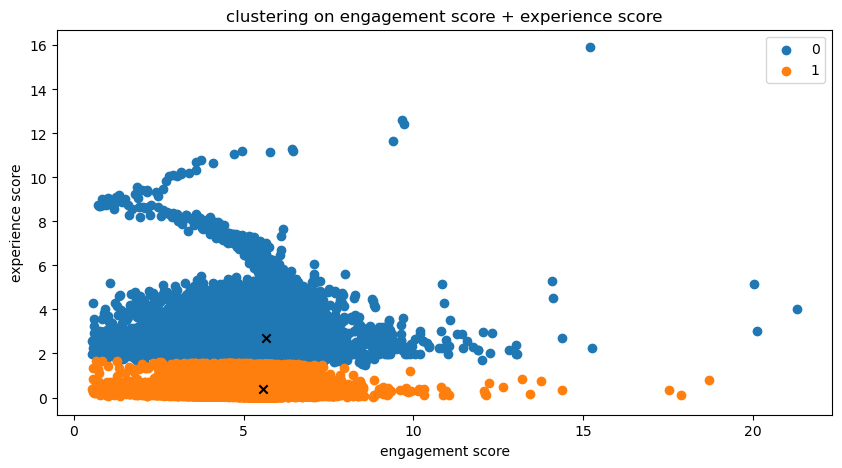

In [40]:
#plotting the results:
plt.figure(figsize=(10,5))
u_labels = np.unique(label)
plt.title(f'clustering on engagement score + experience score')
for i in u_labels:
    plt.scatter(cluster_df[label == i].iloc[:,0] , cluster_df[label == i].iloc[:,1], marker='o', label = i)
plt.scatter(centroids[:,0] , centroids[:,1], marker='x', color = 'black')
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.show()

### Aggregate the average satisfaction & experience score per cluster.

In [41]:
df['cluster'] = label
df.head()

,engagement_score,experience_score,satisfaction_score,cluster
MSISDN/Number,,,,
3.360100e+10,15.192081,15.916637,15.554359,0
3.360100e+10,9.738230,12.435916,11.087073,0
3.360100e+10,9.669098,12.623022,11.146060,0
3.360101e+10,9.414621,11.666216,10.540418,0
3.360101e+10,6.465718,11.189011,8.827364,0


In [42]:
df.to_csv('D:\\Digicrome classes\\NextHIkes\\Project 5\\models\\score_table.csv')

In [43]:
df['cluster'].value_counts()

cluster
0    72128
1    34728
Name: count, dtype: int64

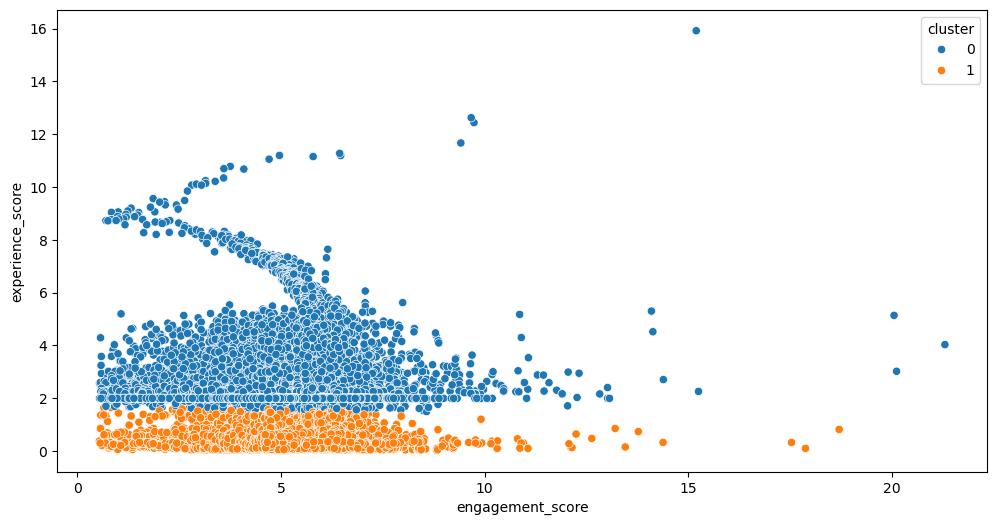

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(df,x='engagement_score', y="experience_score",hue='cluster')
plt.show()

##### Aggregate the average satisfaction & experience score per cluster.

In [45]:
df.groupby('cluster').agg({'engagement_score': 'sum', 'experience_score': 'sum'})

,engagement_score,experience_score
cluster,,
0,407697.662121,194494.045947
1,193864.228696,13064.004896


##### Cluster 1 has higher Engagement and satisfaction score. Cluster 2 has vert low expirience score but low engagement score.

In [63]:
from sqlalchemy import create_engine

# Define SQL Server connection details
server = 'AVIRAL\SQLEXPRESS'  # The name of your server
database = 'MyDatabase'  # The database you want to connect to

# Create a connection string with a trusted connection
connection_url = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Create an engine
engine = create_engine(connection_url)

# Transfer data to SQL Server
table_name = 'user_dataset'
df.to_sql(table_name, engine, if_exists='replace', index=False)

# Confirm completion
print(f"Dataset transferred to SQL Server table: {table_name}")

# Dispose the engine
engine.dispose()

InterfaceError: (pyodbc.InterfaceError) ('28000', '[28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user \'AVIRAL\\Animesh Singh\'. (18456) (SQLDriverConnect); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "MyDatabase" requested by the login. The login failed. (4060); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Login failed for user \'AVIRAL\\Animesh Singh\'. (18456); [28000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Cannot open database "MyDatabase" requested by the login. The login failed. (4060)')
(Background on this error at: https://sqlalche.me/e/20/rvf5)